In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from statsmodels.tools.tools import add_constant

In [129]:
class OLS_reg(object):
    def __init__(self, bias = True):
        self.bias = bias
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        
        if self.bias:
            X = add_constant(X)
            
        self.w_hat_ = np.linalg.inv(X.T @ X) @ X.T @ y
        
        if self.bias:
            print(f'estimated b : {self.w_hat_[0]}')
            print(f'estimated w : {[x.item() for x in self.w_hat_[1:]]}')
        else:
            print(f'estimated b : {[x.item() for x in self.w_hat_]}')
        
        return self
        
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if self.bias:
            X = add_constant(X)
            return np.dot(X, self.w_hat_)
        else:
            return np.dot(X, self.w_hat_)

In [130]:
ols = OLS_reg()

In [142]:
bias = 45
X, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=42
)
y = y.reshape(len(y), 1)

In [143]:
w

array(87.73730719)

In [144]:
ols.fit(X, y)

estimated b : [46.4285139]
estimated w : [87.36641986560689]


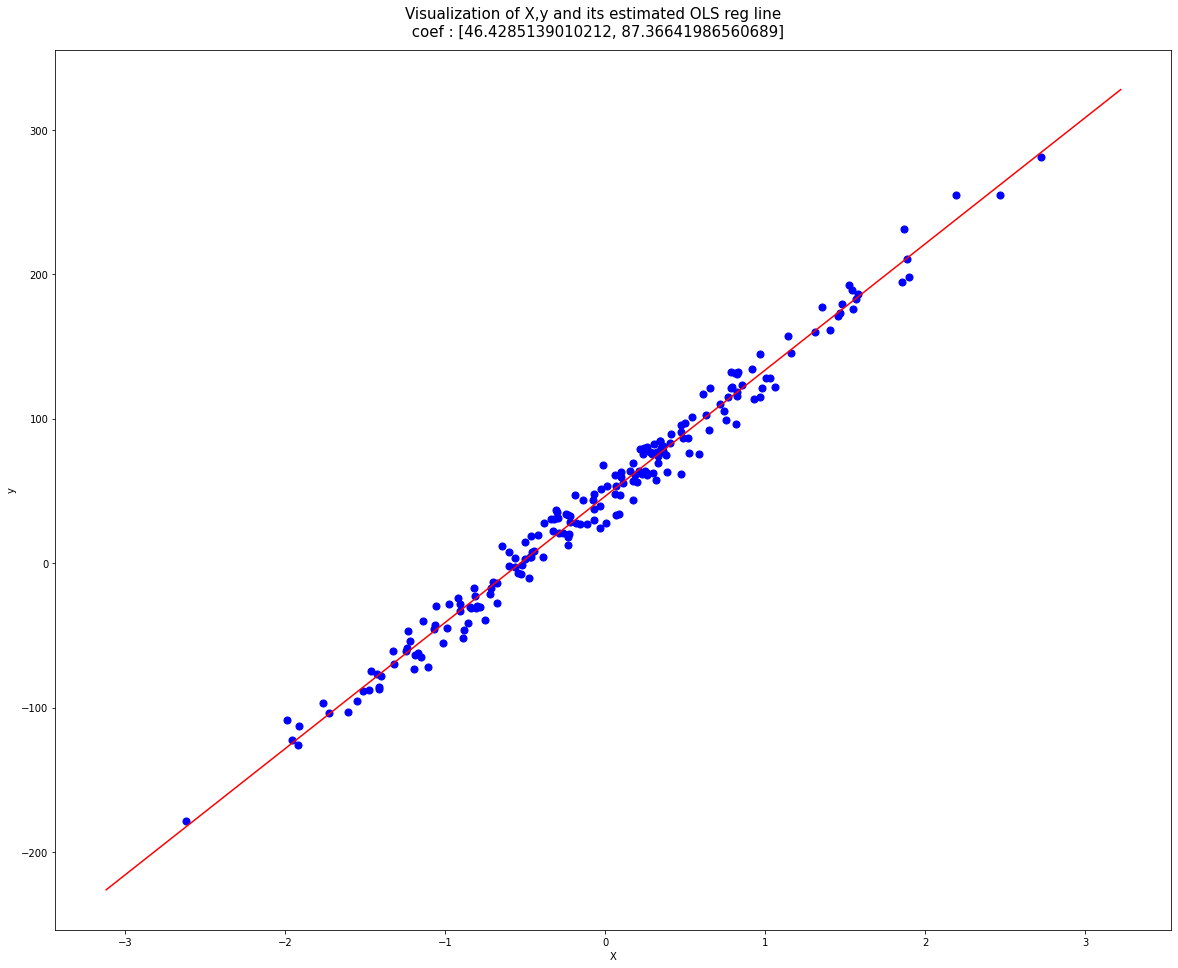

In [183]:
X_vis = np.linspace(X.min()- .5, X.max() + .5, 300)
fig, ax = plt.subplots(figsize = (20, 15))

ax.scatter(X, y, s = 50, c = 'blue')
ax.plot(X_vis, ols.predict(X_vis), c = 'red')
ax.set_xlabel('X')
ax.set_ylabel('y')

plt.tight_layout
plt.suptitle(f"Visualization of X,y and its estimated OLS reg line \n coef : {[x.item() for x in ols.w_hat_]}", fontsize = 15)
plt.subplots_adjust(top = .94)

plt.savefig('Visualization.png')